In [1]:
# fix seed

split_seed = 1234

In [2]:
# load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv', names = range(23))
print(df.head())

   0     1   2   3   4   5   6   7   8   9   ...  13  14  15  16  17  18  19  \
0   3   529   5   4   4   3   1   0   5   1  ...   3   5   1  32   0   2   3   
1   3  1846   3   3   3   4   2  10   3   1  ...   3   2   2  22  12   2   1   
2   3  3240   5   4   5   4   1   0   4   1  ...   4   1   2  61   0   2   5   
3   4   163   2   1   5   3   4   0   3   1  ...   5   5   5  52   7   1   4   
4   3  2813   3   3   5   2   5   0   3   1  ...   3   5   4  24   0   1   5   

   20  21  22  
0   3   2   1  
1   3   3   1  
2   4   1   2  
3   4   2   1  
4   3   1   1  

[5 rows x 23 columns]


In [3]:
# X data normalizing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.loc[:, df.columns != 22]

df_X = pd.DataFrame(scaler.fit_transform(X))
print(df_X.head())
df_y = df[22]

     0         1    2     3     4    5    6         7     8    9   ...   12  \
0  0.50  0.096002  1.0  0.75  0.75  0.6  0.2  0.000000  1.00  0.0  ...  1.0   
1  0.50  0.363304  0.6  0.50  0.50  0.8  0.4  0.012594  0.50  0.0  ...  1.0   
2  0.50  0.646235  1.0  0.75  1.00  0.8  0.2  0.000000  0.75  0.0  ...  0.0   
3  0.75  0.021717  0.4  0.00  1.00  0.6  0.8  0.000000  0.50  0.0  ...  1.0   
4  0.50  0.559570  0.6  0.50  1.00  0.4  1.0  0.000000  0.50  0.0  ...  1.0   

     13   14   15        16        17   18   19    20   21  
0  0.50  1.0  0.2  0.320513  0.000000  1.0  0.6  0.50  0.5  
1  0.50  0.4  0.4  0.192308  0.015094  1.0  0.2  0.50  1.0  
2  0.75  0.2  0.4  0.692308  0.000000  1.0  1.0  0.75  0.0  
3  1.00  1.0  1.0  0.576923  0.008805  0.0  0.8  0.75  0.5  
4  0.50  1.0  0.8  0.217949  0.000000  0.0  1.0  0.50  0.0  

[5 rows x 22 columns]


In [4]:
# feature selection : filter method

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func = chi2, k = df_X.shape[1])
fit = test.fit(df_X, df_y)

print(np.sort(fit.scores_)[::-1])

f_order = np.argsort(-fit.scores_)
sorted_columns = df.columns[f_order]

print(sorted_columns.tolist())

[5.49509555e+02 2.36520563e+02 1.11431480e+02 9.96283292e+01
 5.38567399e+01 4.26981710e+01 4.14276727e+01 3.30914619e+01
 2.89669352e+01 2.65725687e+01 3.28686087e+00 2.44688676e+00
 1.27908353e+00 6.50249199e-01 5.13356106e-01 2.63595940e-01
 2.10240909e-01 2.05763926e-01 1.52444234e-01 2.05977409e-02
 1.42434471e-02 5.12844240e-03]
[9, 21, 5, 20, 1, 2, 11, 3, 13, 19, 17, 7, 15, 10, 0, 4, 6, 12, 16, 8, 14, 18]


In [5]:
# preprocessing

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df_y)
df_y_encoded_nn = pd.DataFrame(encoder.transform(df_y))

fs_nn = sorted_columns[0:13]
df_X_selected_nn = df_X[fs_nn]

np_y = np.array(df_y_encoded_nn).reshape(4000, )
np_X = np.array(df_X_selected_nn)

In [6]:
# load pytorch

import torch
from torch import nn, optim

from tqdm import tqdm
import matplotlib.pyplot as plt

train_X_nn, test_X_nn, train_y_nn, test_y_nn = train_test_split(np_X, np_y, test_size = 0.3, random_state = split_seed)

train_X_nn = torch.tensor(train_X_nn, dtype = torch.float32)
train_y_nn = torch.tensor(train_y_nn, dtype = torch.float32)
test_X_nn = torch.tensor(test_X_nn, dtype = torch.float32)
test_y_nn = torch.tensor(test_y_nn, dtype = torch.float32)

'''
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

'''

print("train data : ", train_X_nn.shape[0])
print("test data : ", test_X_nn.shape[0])

train data :  2800
test data :  1200


In [7]:
# Neural Network

net = nn.Sequential(
    nn.Linear(13, 32),
    nn.ReLU(),
    nn.BatchNorm1d(32),
    nn.Dropout(0.125),
    
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.BatchNorm1d(32),
    nn.Dropout(0.125),
    
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.BatchNorm1d(16),
    nn.Dropout(0.25),
    
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.BatchNorm1d(8),
    nn.Dropout(0.5),
    
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.BatchNorm1d(4),
    nn.Linear(4, 1)
    )

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [03:13<00:00, 51.63it/s]



 0.0001 0.1 10000 

losses   :  0.23634673655033112
accuracy :  0.9421428442001343
test losses   :  0.357587605714798
test accuracy :  0.8666666746139526


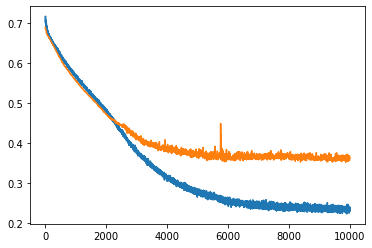

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
net = net.to(device)
train_X_nn = train_X_nn.to(device)
train_y_nn = train_y_nn.to(device)
test_X_nn = test_X_nn.to(device)
test_y_nn = test_y_nn.to(device)

loss_fn = nn.BCEWithLogitsLoss().cuda()
lr = 1e-4
weight_decay = 0.1
optimizer = optim.Adam(net.parameters(), lr = lr, weight_decay = weight_decay)

# train
losses = []
acc_list = []
test_losses = []
test_acc_list = []
epoc_num = 10000

for epoc in tqdm(range(epoc_num)):
    # train data set
    net.train()
    
    y_pred = net(train_X_nn)
    loss = loss_fn(y_pred.view_as(train_y_nn), train_y_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    pred_round =  torch.round(torch.sigmoid(y_pred.view_as(train_y_nn)))
    acc_list.append(torch.mean((train_y_nn == pred_round).float()).item())
    
    # test_data set
    net.eval()
    
    with torch.no_grad():
        test_y_pred = net(test_X_nn)
        test_loss = loss_fn(test_y_pred.view_as(test_y_nn), test_y_nn)
    
    test_losses.append(test_loss.item())
    test_pred_round =  torch.round(torch.sigmoid(test_y_pred.view_as(test_y_nn)))
    test_acc_list.append(torch.mean((test_y_nn == test_pred_round).float()).item())

print("\n", lr, weight_decay, epoc_num, "\n")
    
print("losses   : ", losses[-1])
print("accuracy : ", acc_list[-1])

print("test losses   : ", test_losses[-1])
print("test accuracy : ", test_acc_list[-1])

plt.plot(list(range(epoc_num)), losses, list(range(epoc_num)), test_losses)
plt.show()